In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dp=pd.read_csv('C:\\Users\\MY PC\\OneDrive\\Desktop\\ML_Assignement\\ML_Assignment_1\\Dsata_Set_for_Assignment 1.csv')
dp.shape

(569, 32)

In [3]:
dp.drop(['id'],axis=1,inplace=True)
Y=dp['diagnosis']
Y = Y.replace({'B':1,'M':0})
dp.drop(['diagnosis'],axis=1,inplace=True)
X=dp

In [4]:
print(Y.value_counts())
print(357+212==Y.shape[0])
# This means that the categorical data does not consist any null values.

1    357
0    212
Name: diagnosis, dtype: int64
True


In [5]:
for i in X:
    print(i,"->",np.where(pd.isnull(X[i])))

radius_mean -> (array([533], dtype=int64),)
texture_mean -> (array([], dtype=int64),)
perimeter_mean -> (array([548], dtype=int64),)
area_mean -> (array([], dtype=int64),)
smoothness_mean -> (array([], dtype=int64),)
compactness_mean -> (array([], dtype=int64),)
concavity_mean -> (array([532], dtype=int64),)
concave points_mean -> (array([], dtype=int64),)
symmetry_mean -> (array([], dtype=int64),)
fractal_dimension_mean -> (array([], dtype=int64),)
radius_se -> (array([], dtype=int64),)
texture_se -> (array([], dtype=int64),)
perimeter_se -> (array([], dtype=int64),)
area_se -> (array([], dtype=int64),)
smoothness_se -> (array([], dtype=int64),)
compactness_se -> (array([528], dtype=int64),)
concavity_se -> (array([], dtype=int64),)
concave points_se -> (array([], dtype=int64),)
symmetry_se -> (array([], dtype=int64),)
fractal_dimension_se -> (array([], dtype=int64),)
radius_worst -> (array([], dtype=int64),)
texture_worst -> (array([], dtype=int64),)
perimeter_worst -> (array([], dty

In [6]:
mean1=X['radius_mean'].mean(skipna=True)
dp.iloc[533:534,0:1]=mean1
mean2=X['perimeter_mean'].mean(skipna=True)
dp.iloc[548:549,2:3]=mean2
mean3=X['concavity_mean'].mean(skipna=True)
dp.iloc[532:533,6:7]=mean3
mean4=X['compactness_se'].mean(skipna=True)
dp.iloc[528:529,15:16]=mean4
mean5=X['area_worst'].mean(skipna=True)
dp.iloc[523:524,23:24]=mean5
dp.iloc[552:553,23:24]=mean5
mean6=X['concavity_worst'].mean(skipna=True)
dp.iloc[532:533,26:27]=mean6

In [7]:
for i in X:
    print(i,"->",np.where(pd.isnull(X[i])))

radius_mean -> (array([], dtype=int64),)
texture_mean -> (array([], dtype=int64),)
perimeter_mean -> (array([], dtype=int64),)
area_mean -> (array([], dtype=int64),)
smoothness_mean -> (array([], dtype=int64),)
compactness_mean -> (array([], dtype=int64),)
concavity_mean -> (array([], dtype=int64),)
concave points_mean -> (array([], dtype=int64),)
symmetry_mean -> (array([], dtype=int64),)
fractal_dimension_mean -> (array([], dtype=int64),)
radius_se -> (array([], dtype=int64),)
texture_se -> (array([], dtype=int64),)
perimeter_se -> (array([], dtype=int64),)
area_se -> (array([], dtype=int64),)
smoothness_se -> (array([], dtype=int64),)
compactness_se -> (array([], dtype=int64),)
concavity_se -> (array([], dtype=int64),)
concave points_se -> (array([], dtype=int64),)
symmetry_se -> (array([], dtype=int64),)
fractal_dimension_se -> (array([], dtype=int64),)
radius_worst -> (array([], dtype=int64),)
texture_worst -> (array([], dtype=int64),)
perimeter_worst -> (array([], dtype=int64),)


In [8]:
for i in X:
    X[i]=(X[i]-X[i].mean())/X[i].std()

In [9]:
Y=Y.to_numpy()
Y.shape=(Y.shape[0],1)

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.5

3.Learning_rate=0.01

4.Iterations=1000

5.For all the 3 type of gradient_descent

In [10]:
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
X_train=X.iloc[:, 2:].values
X_test=X.iloc[:, 2:].values
Y_train=Y.iloc[:, 1].values
Y_test=Y.iloc[:, 1].values
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(381, 30) (188, 30) (381, 1) (188, 1)


In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,Y,w,b):
    m=X.shape[0]
    y_pred=sigmoid(np.dot(X,w)+b)
    cost=(-1/m)*np.sum(Y*np.log(y_pred)+(1-Y)*np.log(1-y_pred))
    return cost

def batch_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        y_pred=sigmoid(np.dot(X,w)+b)
        w=w-(learning_rate/m)*np.dot(X.T,(y_pred-Y))
        b=b-(learning_rate/m)*np.sum(y_pred-Y)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def mini_batch_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
            w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
            b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def stochastic_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
        w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
        b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X_batch,Y_batch,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def predict(X,w,b):
    y_pred=sigmoid(np.dot(X,w)+b)
    y_pred=np.where(y_pred>0.5,1,0)
    return y_pred

def accuracy(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    return (np.sum(y_pred==Y_test)/Y_test.shape[0])*100

def recall(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fn=np.sum(np.logical_and(y_pred==0,Y_test==1))
    return (tp/(tp+fn))*100

def precision(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fp=np.sum(np.logical_and(y_pred==1,Y_test==0))
    return (tp/(tp+fp))*100

def f1_score(y_pred,Y_test):
    p=precision(y_pred,Y_test)
    r=recall(y_pred,Y_test)
    return (2*p*r)/(p+r)

The accuracy of the model is: 
98.40425531914893
The cost of the model is: 
0.10799640041079733
The recall of the model is: 
98.34710743801654
The precision of the model is: 
99.16666666666667
The f1_score of the model is: 
98.7551867219917


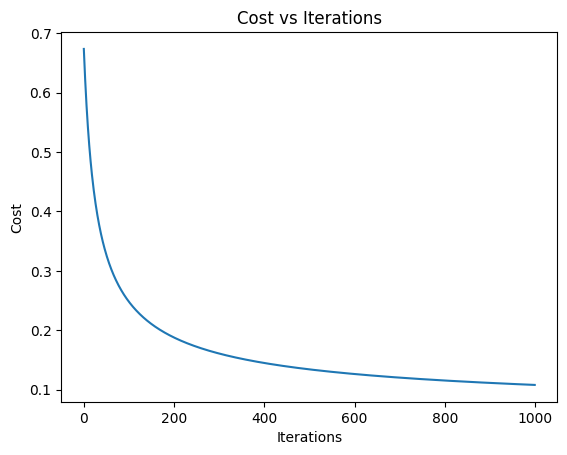

The accuracy of the model is: 
98.40425531914893
The cost of the model is: 
0    0.108033
dtype: float64
The recall of the model is: 
98.34710743801654
The precision of the model is: 
99.16666666666667
The f1_score of the model is: 
98.7551867219917


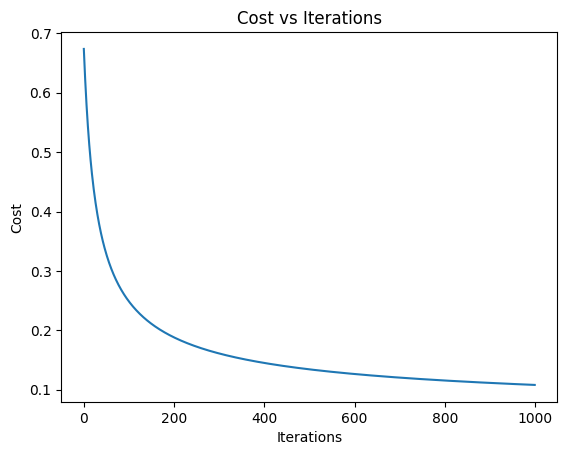

The accuracy of the model is: 
92.5531914893617
The cost of the model is: 
0.2758020543375237
The recall of the model is: 
93.38842975206612
The precision of the model is: 
94.9579831932773
The f1_score of the model is: 
94.16666666666666


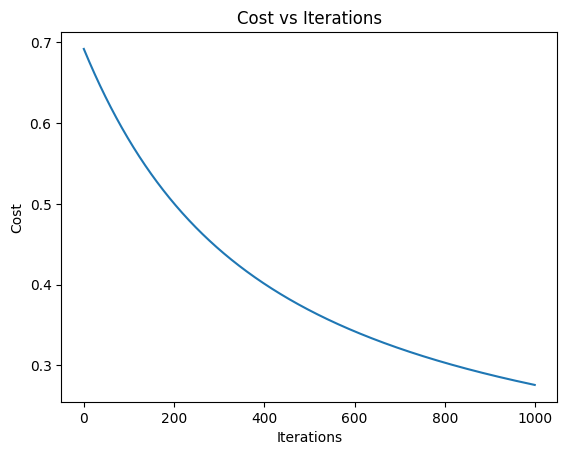

In [12]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('211.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('211_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('211_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.5

3.Learning_rate=0.001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
94.68085106382979
The cost of the model is: 
0.24951243531615805
The recall of the model is: 
94.21487603305785
The precision of the model is: 
97.43589743589743
The f1_score of the model is: 
95.7983193277311


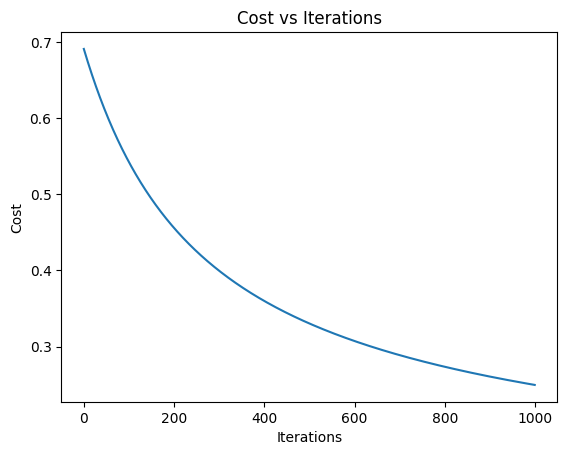

The accuracy of the model is: 
94.68085106382979
The cost of the model is: 
0    0.249575
dtype: float64
The recall of the model is: 
94.21487603305785
The precision of the model is: 
97.43589743589743
The f1_score of the model is: 
95.7983193277311


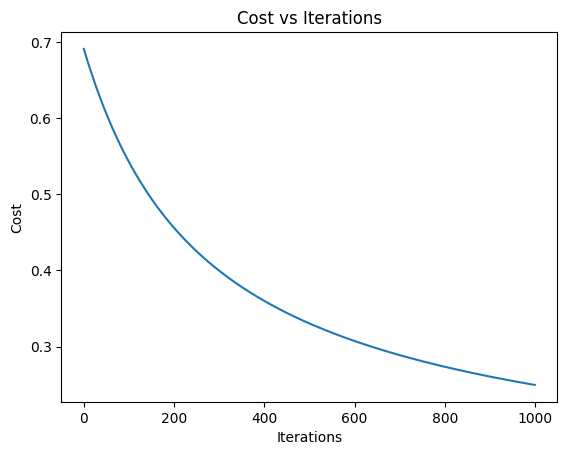

The accuracy of the model is: 
92.02127659574468
The cost of the model is: 
0.5801165991115901
The recall of the model is: 
92.56198347107438
The precision of the model is: 
94.91525423728814
The f1_score of the model is: 
93.72384937238495


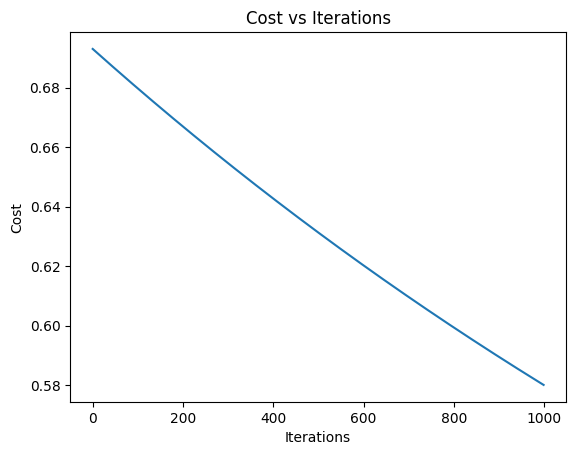

In [13]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('212.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('212_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('212_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.5

3.Learning_rate=0.0001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
92.5531914893617
The cost of the model is: 
0.5436092147811007
The recall of the model is: 
93.38842975206612
The precision of the model is: 
94.9579831932773
The f1_score of the model is: 
94.16666666666666


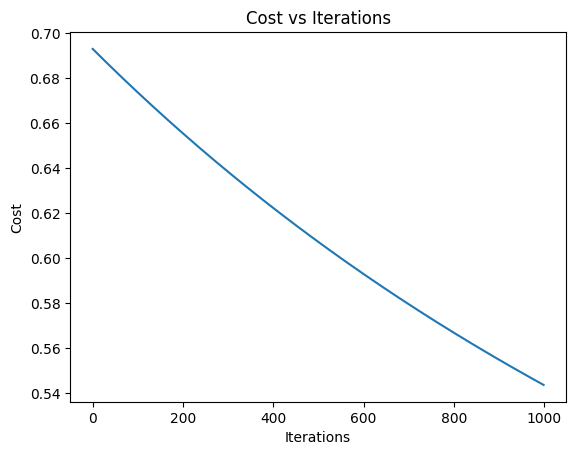

The accuracy of the model is: 
92.5531914893617
The cost of the model is: 
0    0.543624
dtype: float64
The recall of the model is: 
93.38842975206612
The precision of the model is: 
94.9579831932773
The f1_score of the model is: 
94.16666666666666


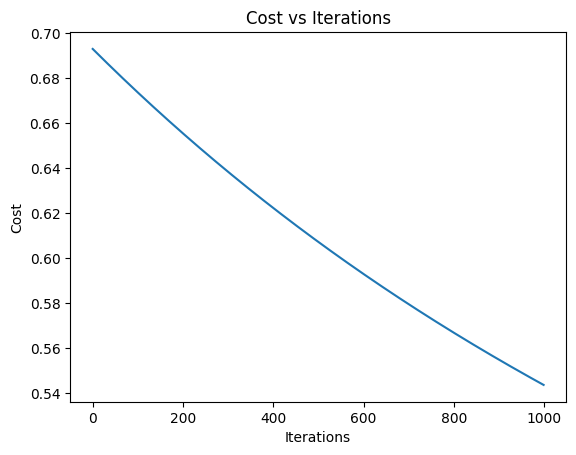

The accuracy of the model is: 
92.02127659574468
The cost of the model is: 
0.6798574579376836
The recall of the model is: 
92.56198347107438
The precision of the model is: 
94.91525423728814
The f1_score of the model is: 
93.72384937238495


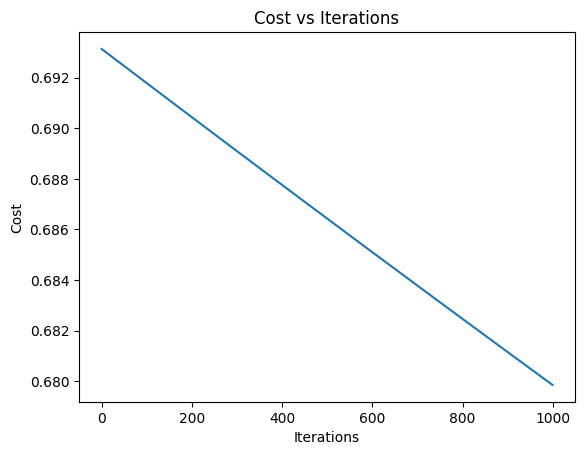

In [14]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('213.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('213_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('213_2.jpg')
plt.show()

# ****END OF PART->1****

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.3

3.Learning_rate=0.01

4.Iterations=1000

5.For all the 3 type of gradient_descent

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(381, 30) (188, 30) (381, 1) (188, 1)


In [16]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,Y,w,b):
    m=X.shape[0]
    y_pred=sigmoid(np.dot(X,w)+b)
    cost=(-1/m)*np.sum(Y*np.log(y_pred+1e-15)+(1-Y)*np.log(1-y_pred+1e-15))
    return cost

def batch_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        y_pred=sigmoid(np.dot(X,w)+b)
        w=w-(learning_rate/m)*np.dot(X.T,(y_pred-Y))
        b=b-(learning_rate/m)*np.sum(y_pred-Y)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def mini_batch_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
            w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
            b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def stochastic_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
        w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
        b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X_batch,Y_batch,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def predict(X,w,b):
    y_pred=sigmoid(np.dot(X,w)+b)
    y_pred=np.where(y_pred>0.3,1,0)
    return y_pred

def accuracy(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    return (np.sum(y_pred==Y_test)/Y_test.shape[0])*100

def recall(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fn=np.sum(np.logical_and(y_pred==0,Y_test==1))
    return (tp/(tp+fn))*100

def precision(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fp=np.sum(np.logical_and(y_pred==1,Y_test==0))
    return (tp/(tp+fp))*100

def f1_score(y_pred,Y_test):
    p=precision(y_pred,Y_test)
    r=recall(y_pred,Y_test)
    return (2*p*r)/(p+r)

The accuracy of the model is: 
96.27659574468085
The cost of the model is: 
0.10799640041079611
The recall of the model is: 
100.0
The precision of the model is: 
94.53125
The f1_score of the model is: 
97.18875502008032


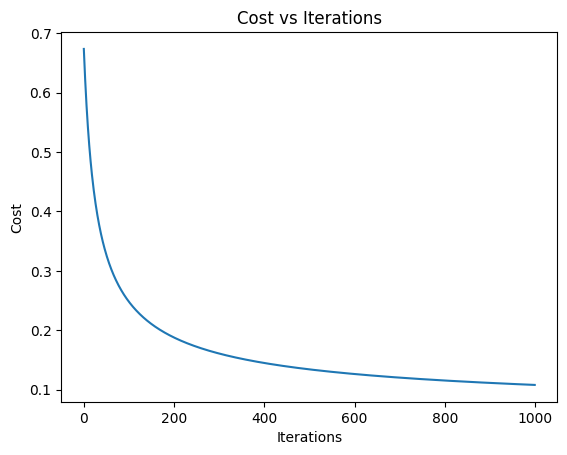

The accuracy of the model is: 
96.27659574468085
The cost of the model is: 
0    0.108033
dtype: float64
The recall of the model is: 
100.0
The precision of the model is: 
94.53125
The f1_score of the model is: 
97.18875502008032


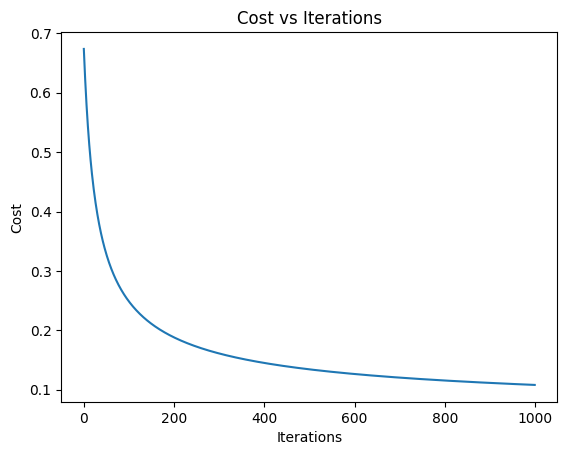

The accuracy of the model is: 
89.8936170212766
The cost of the model is: 
0.27580205433752236
The recall of the model is: 
99.17355371900827
The precision of the model is: 
86.95652173913044
The f1_score of the model is: 
92.66409266409265


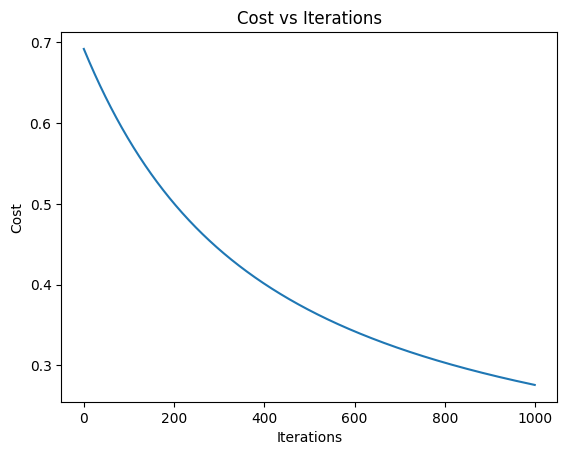

In [17]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('214.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('214_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('214_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.3

3.Learning_rate=0.001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
92.5531914893617
The cost of the model is: 
0.24951243531615677
The recall of the model is: 
100.0
The precision of the model is: 
89.62962962962962
The f1_score of the model is: 
94.53124999999999


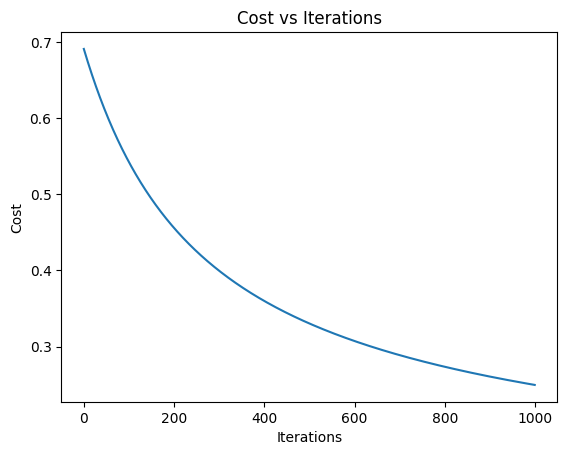

The accuracy of the model is: 
92.5531914893617
The cost of the model is: 
0    0.249575
dtype: float64
The recall of the model is: 
100.0
The precision of the model is: 
89.62962962962962
The f1_score of the model is: 
94.53124999999999


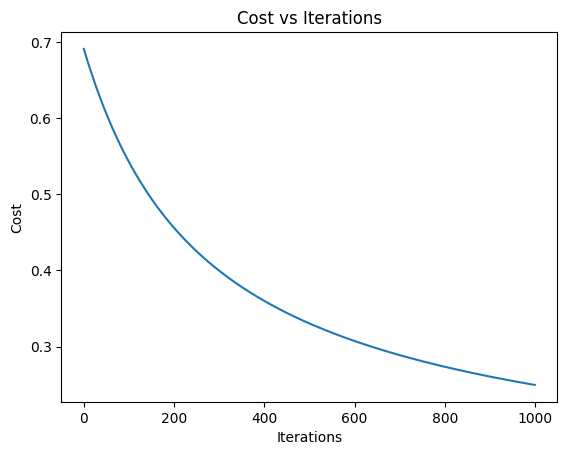

The accuracy of the model is: 
66.48936170212765
The cost of the model is: 
0.5801165991115884
The recall of the model is: 
100.0
The precision of the model is: 
65.76086956521739
The f1_score of the model is: 
79.34426229508198


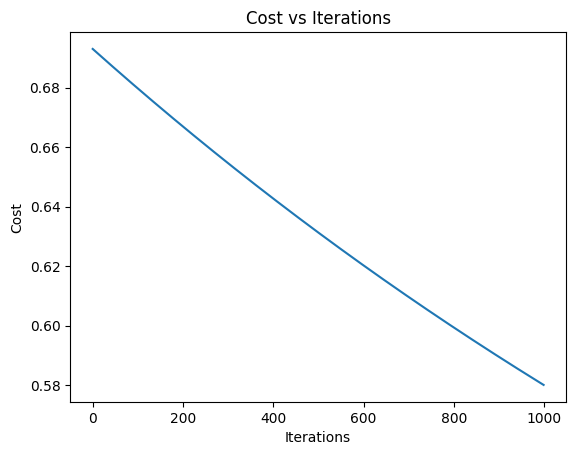

In [18]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('215.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('215_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('215_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.3

3.Learning_rate=0.0001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
70.2127659574468
The cost of the model is: 
0.543609214781099
The recall of the model is: 
100.0
The precision of the model is: 
68.36158192090396
The f1_score of the model is: 
81.20805369127515


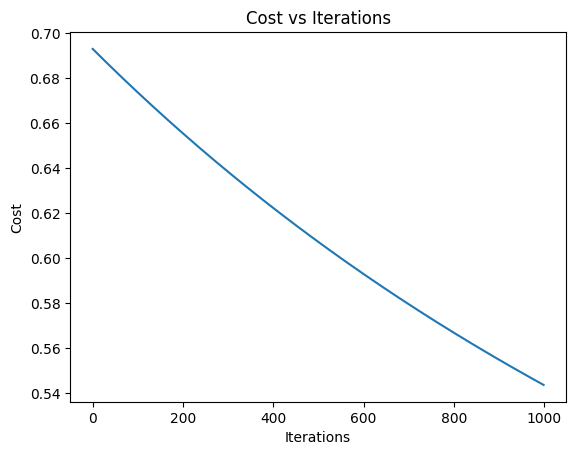

The accuracy of the model is: 
70.2127659574468
The cost of the model is: 
0    0.543624
dtype: float64
The recall of the model is: 
100.0
The precision of the model is: 
68.36158192090396
The f1_score of the model is: 
81.20805369127515


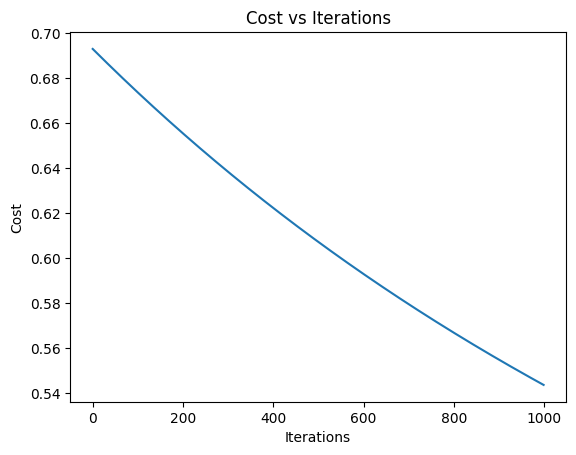

The accuracy of the model is: 
64.36170212765957
The cost of the model is: 
0.6798574579376816
The recall of the model is: 
100.0
The precision of the model is: 
64.36170212765957
The f1_score of the model is: 
78.31715210355988


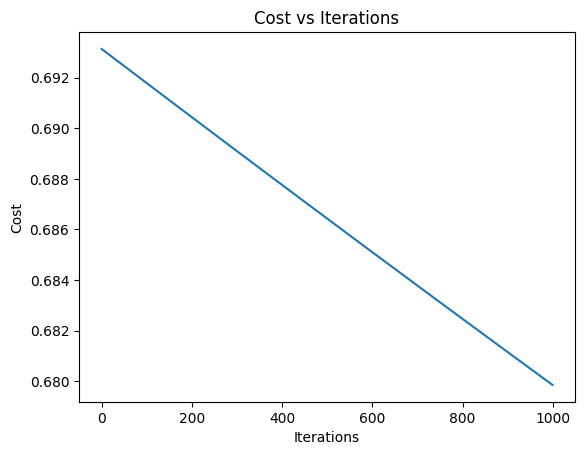

In [19]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('216.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('216_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('216_2.jpg')
plt.show()

# ****END OF PART->2****

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.4

3.Learning_rate=0.01

4.Iterations=1000

5.For all the 3 type of gradient_descent

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(381, 30) (188, 30) (381, 1) (188, 1)


In [21]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,Y,w,b):
    m=X.shape[0]
    y_pred=sigmoid(np.dot(X,w)+b)
    cost=(-1/m)*np.sum(Y*np.log(y_pred+1e-15)+(1-Y)*np.log(1-y_pred+1e-15))
    return cost

def batch_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        y_pred=sigmoid(np.dot(X,w)+b)
        w=w-(learning_rate/m)*np.dot(X.T,(y_pred-Y))
        b=b-(learning_rate/m)*np.sum(y_pred-Y)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def mini_batch_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
            w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
            b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def stochastic_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
        w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
        b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X_batch,Y_batch,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def predict(X,w,b):
    y_pred=sigmoid(np.dot(X,w)+b)
    y_pred=np.where(y_pred>0.4,1,0)
    return y_pred

def accuracy(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    return (np.sum(y_pred==Y_test)/Y_test.shape[0])*100

def recall(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fn=np.sum(np.logical_and(y_pred==0,Y_test==1))
    return (tp/(tp+fn))*100

def precision(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fp=np.sum(np.logical_and(y_pred==1,Y_test==0))
    return (tp/(tp+fp))*100

def f1_score(y_pred,Y_test):
    p=precision(y_pred,Y_test)
    r=recall(y_pred,Y_test)
    return (2*p*r)/(p+r)

The accuracy of the model is: 
97.87234042553192
The cost of the model is: 
0.10799640041079611
The recall of the model is: 
99.17355371900827
The precision of the model is: 
97.5609756097561
The f1_score of the model is: 
98.3606557377049


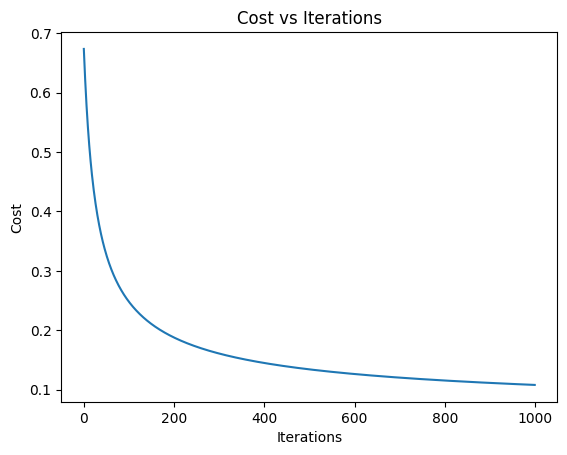

The accuracy of the model is: 
97.87234042553192
The cost of the model is: 
0    0.108033
dtype: float64
The recall of the model is: 
99.17355371900827
The precision of the model is: 
97.5609756097561
The f1_score of the model is: 
98.3606557377049


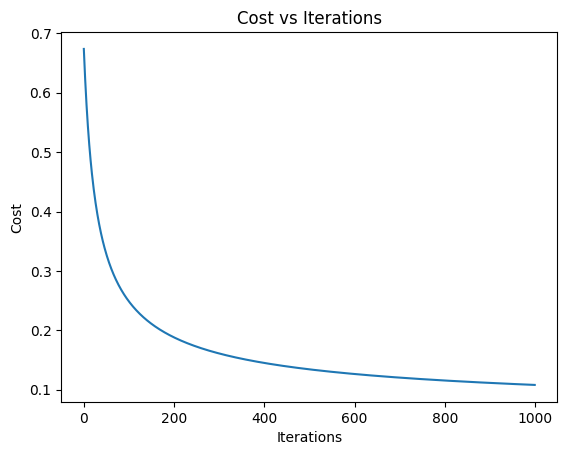

The accuracy of the model is: 
92.5531914893617
The cost of the model is: 
0.27580205433752236
The recall of the model is: 
95.86776859504133
The precision of the model is: 
92.80000000000001
The f1_score of the model is: 
94.3089430894309


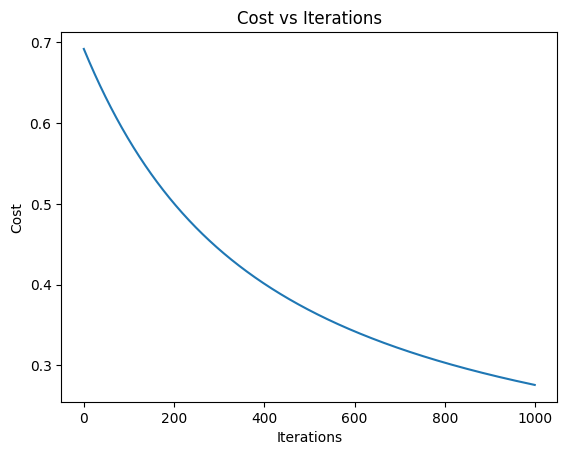

In [22]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('217.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('217_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('217_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.4

3.Learning_rate=0.001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
94.14893617021278
The cost of the model is: 
0.24951243531615677
The recall of the model is: 
97.52066115702479
The precision of the model is: 
93.65079365079364
The f1_score of the model is: 
95.54655870445345


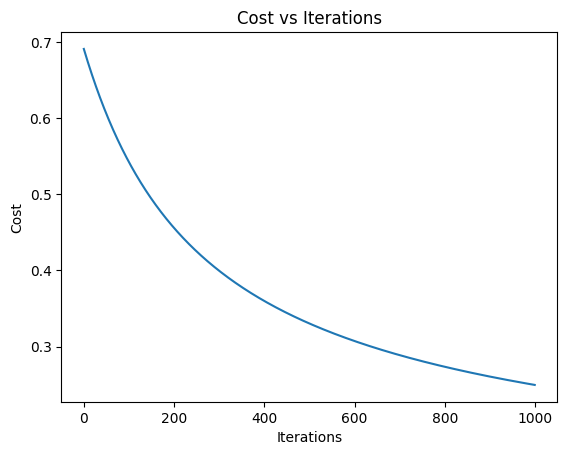

The accuracy of the model is: 
94.14893617021278
The cost of the model is: 
0    0.249575
dtype: float64
The recall of the model is: 
97.52066115702479
The precision of the model is: 
93.65079365079364
The f1_score of the model is: 
95.54655870445345


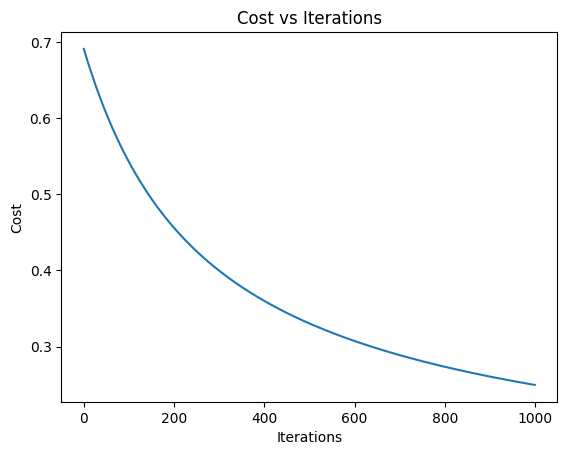

The accuracy of the model is: 
79.25531914893617
The cost of the model is: 
0.5801165991115884
The recall of the model is: 
100.0
The precision of the model is: 
75.625
The f1_score of the model is: 
86.12099644128114


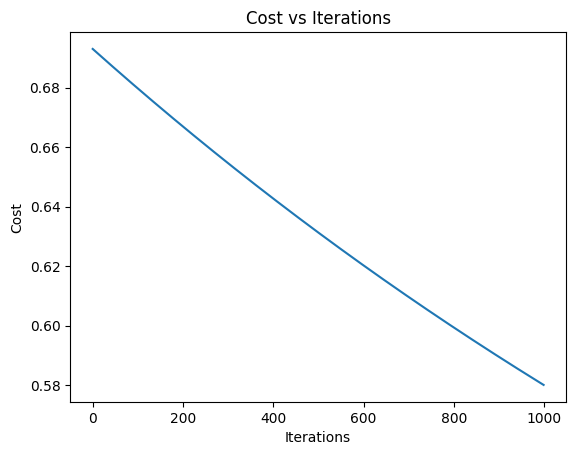

In [23]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('218.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('218_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('218_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.4

3.Learning_rate=0.0001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
82.97872340425532
The cost of the model is: 
0.543609214781099
The recall of the model is: 
100.0
The precision of the model is: 
79.08496732026144
The f1_score of the model is: 
88.32116788321167


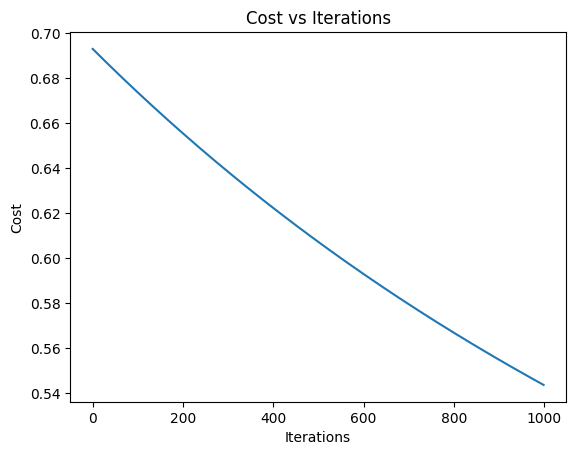

The accuracy of the model is: 
82.97872340425532
The cost of the model is: 
0    0.543624
dtype: float64
The recall of the model is: 
100.0
The precision of the model is: 
79.08496732026144
The f1_score of the model is: 
88.32116788321167


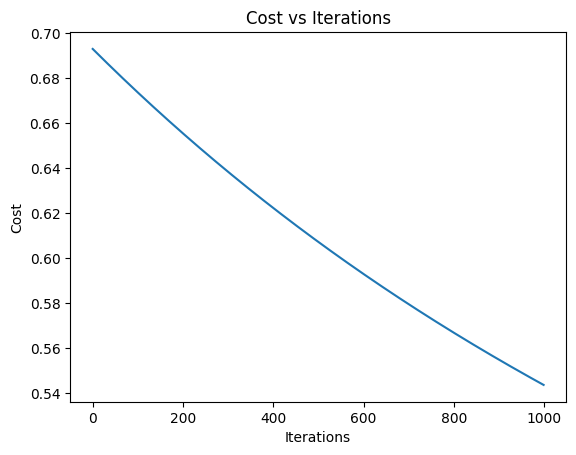

The accuracy of the model is: 
64.36170212765957
The cost of the model is: 
0.6798574579376816
The recall of the model is: 
100.0
The precision of the model is: 
64.36170212765957
The f1_score of the model is: 
78.31715210355988


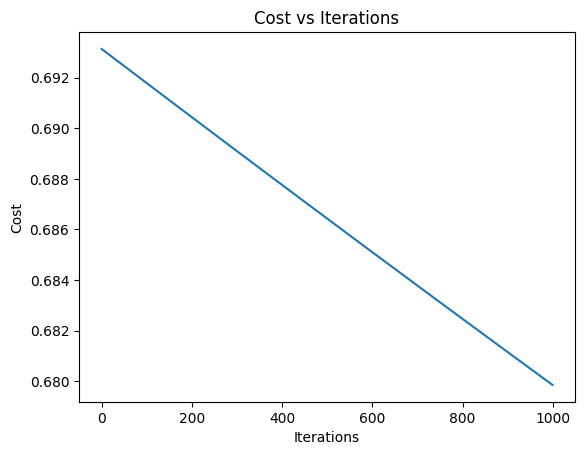

In [24]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('219.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('219_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('219_2.jpg')
plt.show()

# ****END OF PART->3****

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.6

3.Learning_rate=0.01

4.Iterations=1000

5.For all the 3 type of gradient_descent

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(381, 30) (188, 30) (381, 1) (188, 1)


In [26]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,Y,w,b):
    m=X.shape[0]
    y_pred=sigmoid(np.dot(X,w)+b)
    cost=(-1/m)*np.sum(Y*np.log(y_pred+1e-15)+(1-Y)*np.log(1-y_pred+1e-15))
    return cost

def batch_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        y_pred=sigmoid(np.dot(X,w)+b)
        w=w-(learning_rate/m)*np.dot(X.T,(y_pred-Y))
        b=b-(learning_rate/m)*np.sum(y_pred-Y)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def mini_batch_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
            w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
            b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def stochastic_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
        w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
        b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X_batch,Y_batch,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def predict(X,w,b):
    y_pred=sigmoid(np.dot(X,w)+b)
    y_pred=np.where(y_pred>0.6,1,0)
    return y_pred

def accuracy(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    return (np.sum(y_pred==Y_test)/Y_test.shape[0])*100

def recall(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fn=np.sum(np.logical_and(y_pred==0,Y_test==1))
    return (tp/(tp+fn))*100

def precision(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fp=np.sum(np.logical_and(y_pred==1,Y_test==0))
    return (tp/(tp+fp))*100

def f1_score(y_pred,Y_test):
    p=precision(y_pred,Y_test)
    r=recall(y_pred,Y_test)
    return (2*p*r)/(p+r)

The accuracy of the model is: 
96.27659574468085
The cost of the model is: 
0.10799640041079611
The recall of the model is: 
95.0413223140496
The precision of the model is: 
99.13793103448276
The f1_score of the model is: 
97.0464135021097


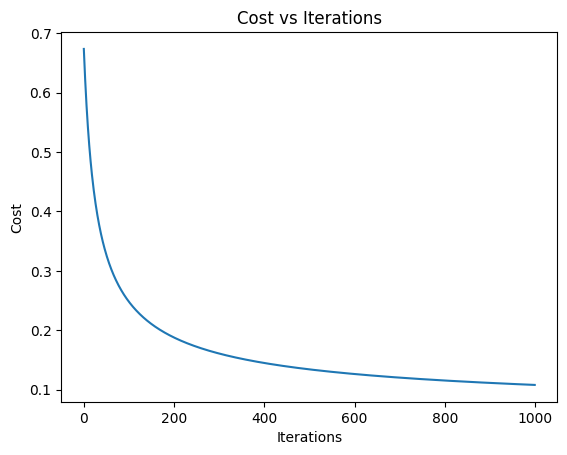

The accuracy of the model is: 
96.27659574468085
The cost of the model is: 
0    0.108033
dtype: float64
The recall of the model is: 
95.0413223140496
The precision of the model is: 
99.13793103448276
The f1_score of the model is: 
97.0464135021097


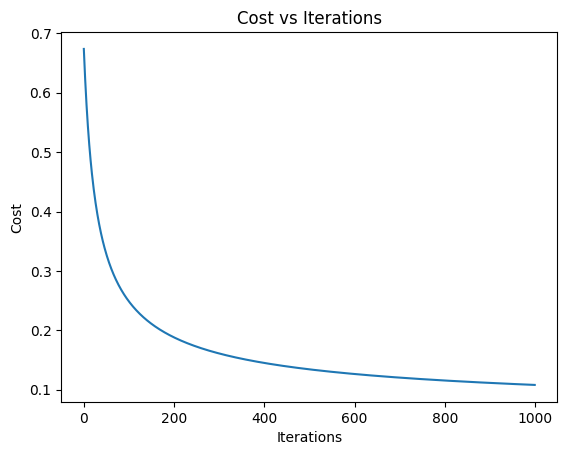

The accuracy of the model is: 
91.48936170212765
The cost of the model is: 
0.27580205433752236
The recall of the model is: 
86.77685950413223
The precision of the model is: 
100.0
The f1_score of the model is: 
92.92035398230088


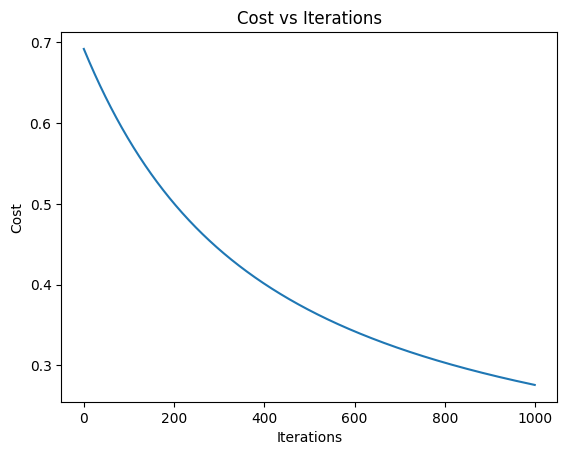

In [27]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2110.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2110_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2110_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.6

3.Learning_rate=0.001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
93.08510638297872
The cost of the model is: 
0.24951243531615677
The recall of the model is: 
89.25619834710744
The precision of the model is: 
100.0
The f1_score of the model is: 
94.32314410480349


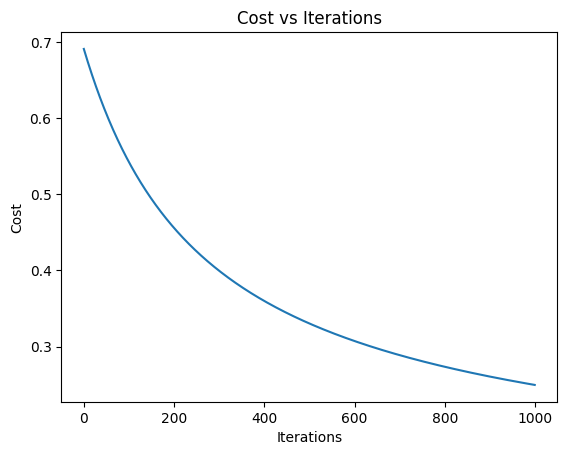

The accuracy of the model is: 
93.08510638297872
The cost of the model is: 
0    0.249575
dtype: float64
The recall of the model is: 
89.25619834710744
The precision of the model is: 
100.0
The f1_score of the model is: 
94.32314410480349


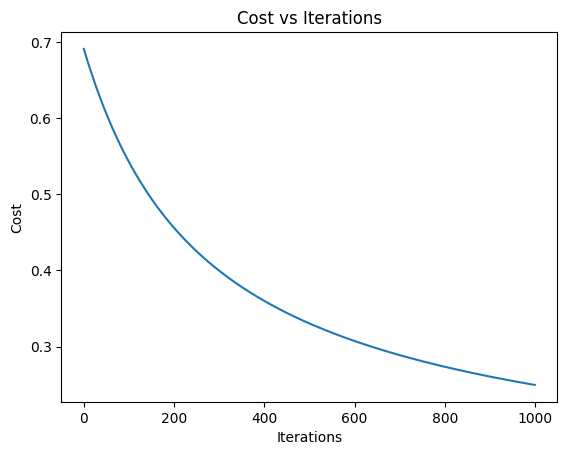

The accuracy of the model is: 
41.48936170212766
The cost of the model is: 
0.5801165991115884
The recall of the model is: 
9.090909090909092
The precision of the model is: 
100.0
The f1_score of the model is: 
16.666666666666668


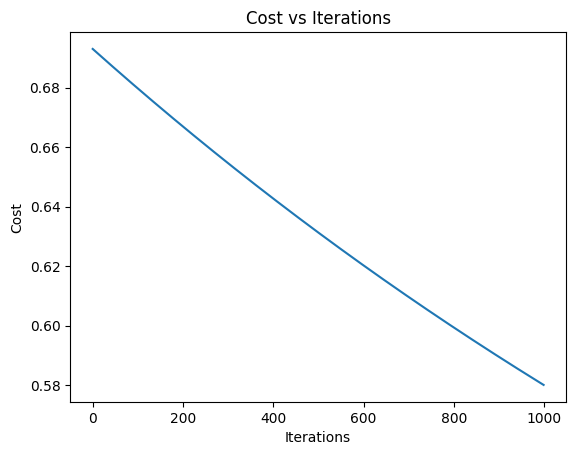

In [28]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2111.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2111_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2111_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.6

3.Learning_rate=0.0001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
47.340425531914896
The cost of the model is: 
0.543609214781099
The recall of the model is: 
18.181818181818183
The precision of the model is: 
100.0
The f1_score of the model is: 
30.76923076923077


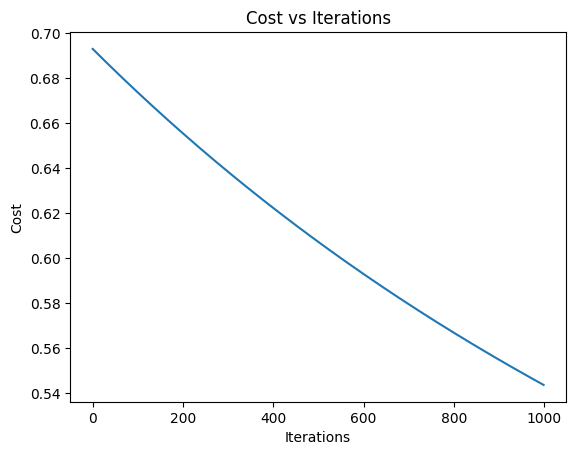

The accuracy of the model is: 
47.340425531914896
The cost of the model is: 
0    0.543624
dtype: float64
The recall of the model is: 
18.181818181818183
The precision of the model is: 
100.0
The f1_score of the model is: 
30.76923076923077


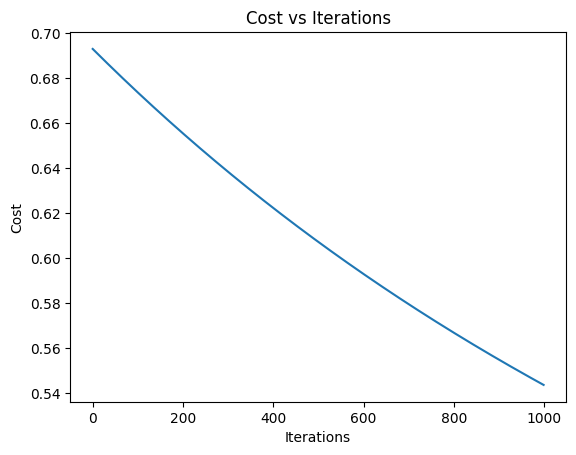

The accuracy of the model is: 
35.638297872340424
The cost of the model is: 
0.6798574579376816
The recall of the model is: 
0.0
The precision of the model is: 
nan
The f1_score of the model is: 
nan


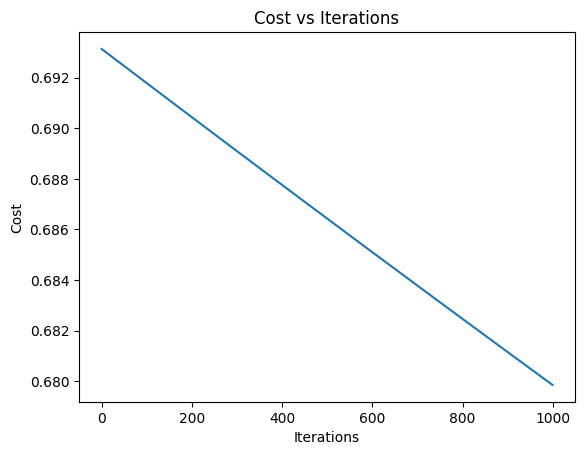

In [29]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2112.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2112_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2112_2.jpg')
plt.show()

# ****END OF PART->4****

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.7

3.Learning_rate=0.01

4.Iterations=1000

5.For all the 3 type of gradient_descent

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(381, 30) (188, 30) (381, 1) (188, 1)


In [31]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,Y,w,b):
    m=X.shape[0]
    y_pred=sigmoid(np.dot(X,w)+b)
    cost=(-1/m)*np.sum(Y*np.log(y_pred+1e-15)+(1-Y)*np.log(1-y_pred+1e-15))
    return cost

def batch_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        y_pred=sigmoid(np.dot(X,w)+b)
        w=w-(learning_rate/m)*np.dot(X.T,(y_pred-Y))
        b=b-(learning_rate/m)*np.sum(y_pred-Y)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def mini_batch_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
            w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
            b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def stochastic_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
        w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
        b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X_batch,Y_batch,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def predict(X,w,b):
    y_pred=sigmoid(np.dot(X,w)+b)
    y_pred=np.where(y_pred>0.7,1,0)
    return y_pred

def accuracy(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    return (np.sum(y_pred==Y_test)/Y_test.shape[0])*100

def recall(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fn=np.sum(np.logical_and(y_pred==0,Y_test==1))
    return (tp/(tp+fn))*100

def precision(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fp=np.sum(np.logical_and(y_pred==1,Y_test==0))
    return (tp/(tp+fp))*100

def f1_score(y_pred,Y_test):
    p=precision(y_pred,Y_test)
    r=recall(y_pred,Y_test)
    return (2*p*r)/(p+r)

The accuracy of the model is: 
94.68085106382979
The cost of the model is: 
0.10799640041079611
The recall of the model is: 
92.56198347107438
The precision of the model is: 
99.11504424778761
The f1_score of the model is: 
95.72649572649571


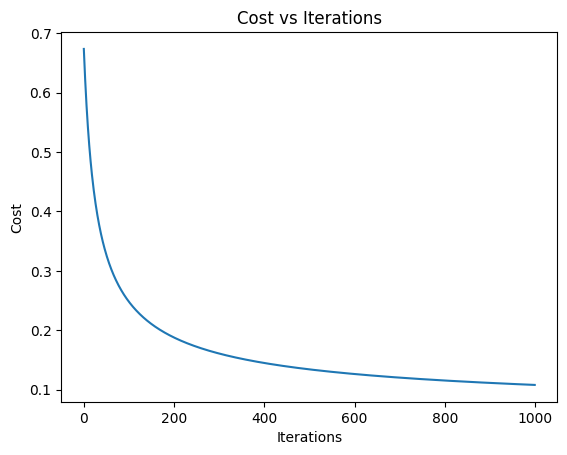

The accuracy of the model is: 
94.68085106382979
The cost of the model is: 
0    0.108033
dtype: float64
The recall of the model is: 
92.56198347107438
The precision of the model is: 
99.11504424778761
The f1_score of the model is: 
95.72649572649571


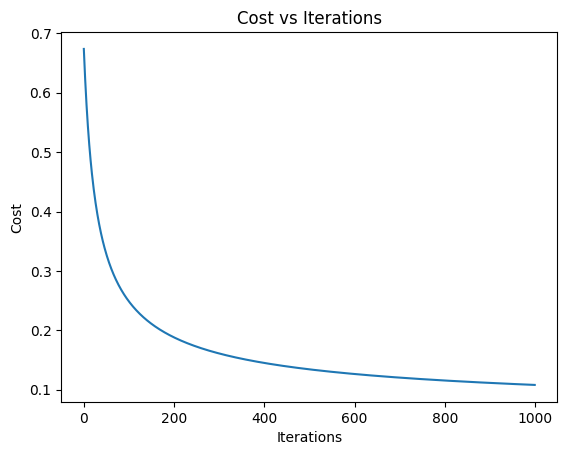

The accuracy of the model is: 
82.4468085106383
The cost of the model is: 
0.27580205433752236
The recall of the model is: 
72.72727272727273
The precision of the model is: 
100.0
The f1_score of the model is: 
84.21052631578947


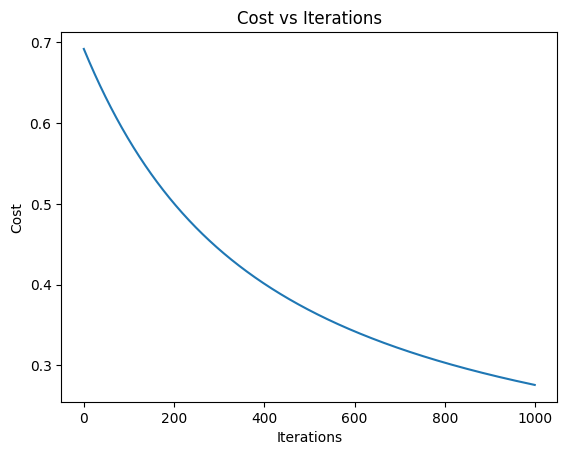

In [32]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2113.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2113_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2113_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.7

3.Learning_rate=0.001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
86.17021276595744
The cost of the model is: 
0.24951243531615677
The recall of the model is: 
78.51239669421489
The precision of the model is: 
100.0
The f1_score of the model is: 
87.96296296296296


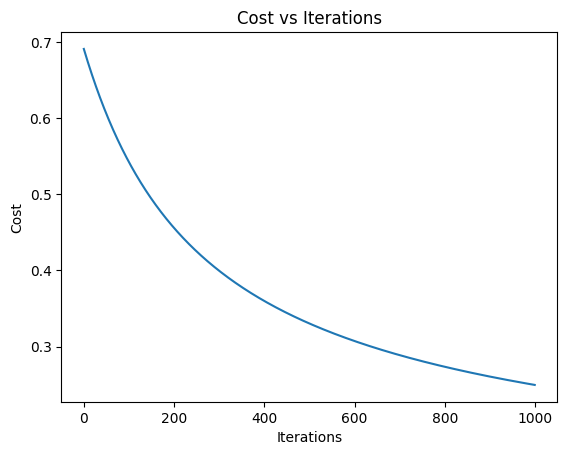

The accuracy of the model is: 
86.17021276595744
The cost of the model is: 
0    0.249575
dtype: float64
The recall of the model is: 
78.51239669421489
The precision of the model is: 
100.0
The f1_score of the model is: 
87.96296296296296


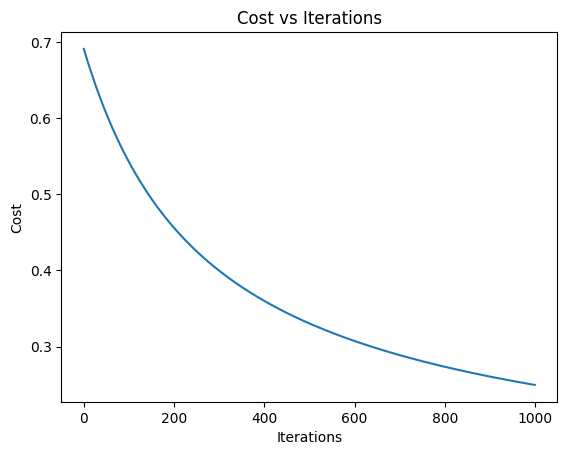

The accuracy of the model is: 
35.638297872340424
The cost of the model is: 
0.5801165991115884
The recall of the model is: 
0.0
The precision of the model is: 
nan
The f1_score of the model is: 
nan


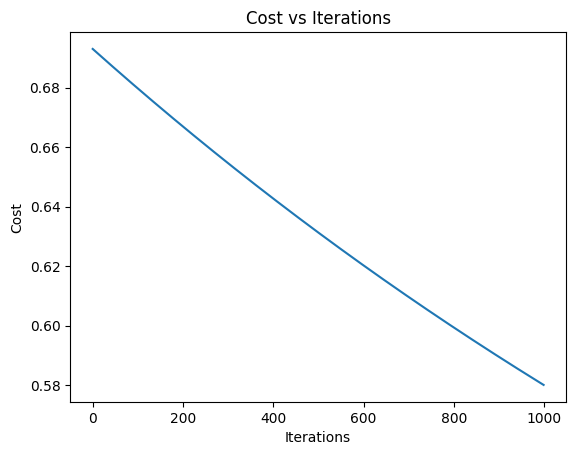

In [33]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2114.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2114_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2114_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.7

3.Learning_rate=0.0001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
35.638297872340424
The cost of the model is: 
0.543609214781099
The recall of the model is: 
0.0
The precision of the model is: 
nan
The f1_score of the model is: 
nan


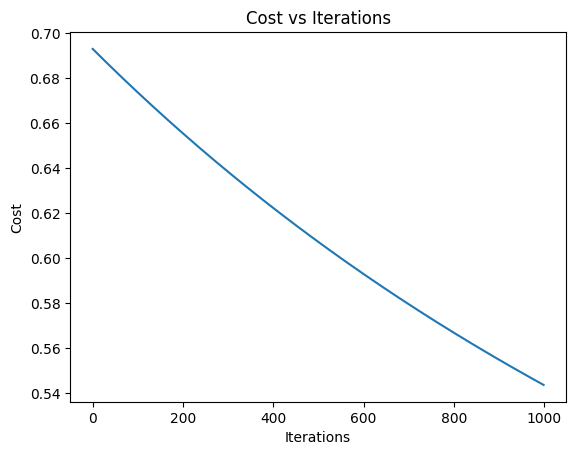

The accuracy of the model is: 
35.638297872340424
The cost of the model is: 
0    0.543624
dtype: float64
The recall of the model is: 
0.0
The precision of the model is: 
nan
The f1_score of the model is: 
nan


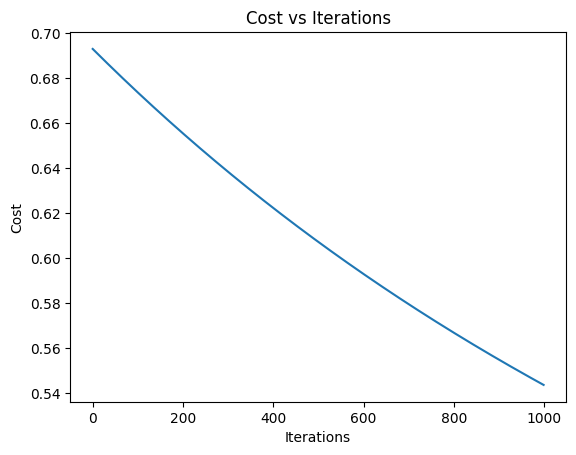

The accuracy of the model is: 
35.638297872340424
The cost of the model is: 
0.6798574579376816
The recall of the model is: 
0.0
The precision of the model is: 
nan
The f1_score of the model is: 
nan


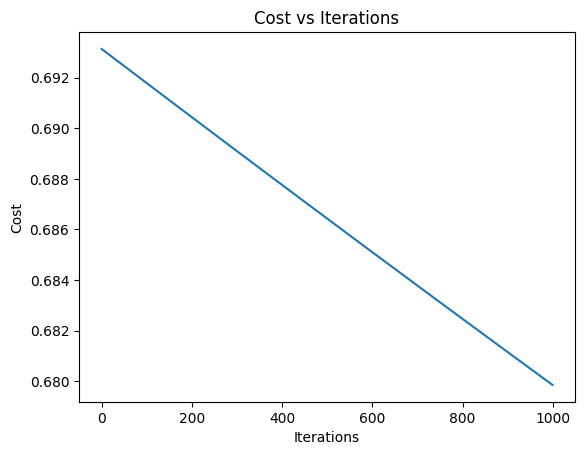

In [34]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2115.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2115_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('2115_2.jpg')
plt.show()

# ****END OF PART->5**** 